# Digit Recognizer Kaggle Competition

**Authors:** Dermot O'Brien
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

## Data Understanding

Describe the data being used for this project.
***

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

In [2]:
# Import the training and testing data
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')

In [3]:
# Take a look at the training data
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Check the shape of train and test data
print('Train Shape:', train_df.shape)
print('Test Shape: ', test_df.shape)

Train Shape: (42000, 785)
Test Shape:  (28000, 784)


/Users/dermotobrien/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


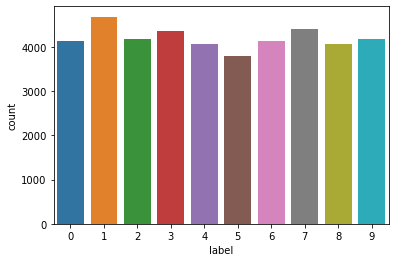

In [5]:
# Visualize count for each digit in train data
sns.countplot('label',data=train_df)
plt.show()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

### Create X and y datasets for train and test data

In [6]:
X_train = train_df.drop('label',axis=1)
y_train = train_df['label']
X_test = test_df

### Scaling Data
Since the number for pixels varies between 0-255, we are going to scale the data by diving each pixel by 255

In [7]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Reshape Data

In [8]:
X_train_scaled = X_train_scaled.values.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.values.reshape(-1,28,28,1)
X_train_scaled.shape, X_test_scaled.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### One-Hot Encoding

In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(42000, 10)

### Train Test Split the training data

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train)
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)

X_train Shape: (31500, 28, 28, 1)
y_train Shape: (31500, 10)


### Visualize an image

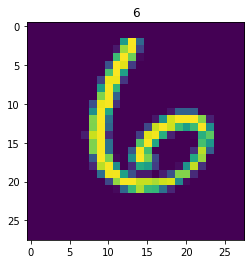

In [11]:
plt.imshow(X_train[0][:,:,0])
plt.title(y_train[0].argmax());

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

In [12]:
# Define the model for Adam Optimizer
model_adam = tf.keras.models.Sequential([
  # Layer 1
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Layer 2
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # Layer 3
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # FC 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Create the same model for SGD Optimizer
model_sgd = tf.keras.models.Sequential([
  # Layer 1
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Layer 2
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # Layer 3
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  # FC 
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
# Check summary of either model
model_adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0

In [13]:
# Define the callback function to stop training once the acceptable accuracy is reached

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [15]:
# Adam Optimizer
adam_opt = Adam(learning_rate=0.0005, name='adam')
model_adam.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_adam.fit(X_train, y_train, batch_size=50, epochs=20, callbacks=[callbacks], validation_data=(X_val, y_val))

Epoch 1/20
630/630 [==============================] - 48s 77ms/step - loss: 0.4225 - accuracy: 0.8581 - val_loss: 0.0723 - val_accuracy: 0.9777
Epoch 2/20
630/630 [==============================] - 49s 78ms/step - loss: 0.1013 - accuracy: 0.9709 - val_loss: 0.0514 - val_accuracy: 0.9853
Epoch 3/20
630/630 [==============================] - 48s 77ms/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.0526 - val_accuracy: 0.9855
Epoch 4/20
630/630 [==============================] - 1257s 2s/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 0.0363 - val_accuracy: 0.9901
Epoch 5/20
630/630 [==============================] - 53s 84ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0460 - val_accuracy: 0.9870
Epoch 6/20
630/630 [==============================] - 49s 78ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 7/20
630/630 [==============================] - 51s 81ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0368 - val_accuracy:

In [ ]:
# Adam Results
# loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0346 - val_accuracy: 0.9922

In [16]:
# SGD optimizer
sgd_opt = SGD(learning_rate=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
model_sgd.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_sgd.fit(X_train, y_train, epochs=20, callbacks=[callbacks], validation_data=(X_val, y_val))

Epoch 1/20
985/985 [==============================] - 57s 57ms/step - loss: 2.3017 - accuracy: 0.1258 - val_loss: 2.2990 - val_accuracy: 0.1191
Epoch 2/20
985/985 [==============================] - 56s 57ms/step - loss: 2.2995 - accuracy: 0.1396 - val_loss: 2.2964 - val_accuracy: 0.1116
Epoch 3/20
985/985 [==============================] - 56s 57ms/step - loss: 2.2973 - accuracy: 0.1379 - val_loss: 2.2935 - val_accuracy: 0.1115
Epoch 4/20
985/985 [==============================] - 56s 57ms/step - loss: 2.2948 - accuracy: 0.1378 - val_loss: 2.2898 - val_accuracy: 0.1124
Epoch 5/20
985/985 [==============================] - 57s 57ms/step - loss: 2.2919 - accuracy: 0.1481 - val_loss: 2.2847 - val_accuracy: 0.1179
Epoch 6/20
985/985 [==============================] - 56s 57ms/step - loss: 2.2872 - accuracy: 0.1696 - val_loss: 2.2771 - val_accuracy: 0.1472
Epoch 7/20
985/985 [==============================] - 57s 58ms/step - loss: 2.2800 - accuracy: 0.1963 - val_loss: 2.2644 - val_accuracy:

In [ ]:
# SGD Results
# loss: 0.2617 - accuracy: 0.9206 - val_loss: 0.1344 - val_accuracy: 0.9608

## Evaluation
Looks like the SGD Optimizer had a higher accuracy, 0.9987. Let's do some model evaluation now.

In [18]:
# Evaluate both mdoels on the validation set
adam_score = model_adam.evaluate(X_val, y_val)
sgd_score = model_sgd.evaluate(X_val, y_val)
print('Adam Val Accuracy:', adam_score[1])
print('SGD Val Accuracy:', sgd_score[1])

329/329 [==============================] - 2s 6ms/step - loss: 0.1344 - accuracy: 0.9608
Adam Val Accuracy: 0.9921904802322388
SGD Val Accuracy: 0.9607619047164917


In [19]:
# Use the Adam model to predict digit values on our test set
results = model_adam.predict(X_test_scaled)
results = np.argmax(results, axis=1)
y_pred = pd.Series(results, name="Label")

In [22]:
# Create a correclty formatted csv file for submission!
submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
submission.to_csv('./Submission_File/submission.csv', index=False)

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***